In [45]:
import warnings
warnings.filterwarnings('ignore')
import time
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
import logging
import time
import json


In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

logger = tf.get_logger()
logger.setLevel(logging.ERROR)
print('Using:')
print('\t\u2022 TensorFlow version:', tf.__version__)
print('\t\u2022 tf.keras version:', tf.keras.__version__)
print('\t\u2022 Running on GPU' if tf.test.is_gpu_available() else '\t\u2022 GPU device not found. Running on CPU')

Using:
	• TensorFlow version: 2.3.0
	• tf.keras version: 2.4.0
	• GPU device not found. Running on CPU


In [47]:
# TODO: Load the dataset with TensorFlow Datasets.
dataset, dataset_info = tfds.load('oxford_flowers102', as_supervised=True, with_info=True)
# TODO: Create a training set, a validation set and a test set.
training_set, validation_set, test_set = dataset['train'],dataset['validation'], dataset['test']

In [48]:
num_train=dataset_info.splits['train'].num_examples
num_test=dataset_info.splits['test'].num_examples
num_val=dataset_info.splits['validation'].num_examples

# TODO: Get the number of classes in the dataset from the dataset info.

num_classes = dataset_info.features['label'].num_classes


print('There are {:,} classes in our dataset'.format(num_classes))

print('\nThere are {:,} images in the test set'.format(num_test))
print('There are {:,} images in the training set'.format(num_train))
print('There are {:,} images in the validation set'.format(num_val))



There are 102 classes in our dataset

There are 6,149 images in the test set
There are 1,020 images in the training set
There are 1,020 images in the validation set


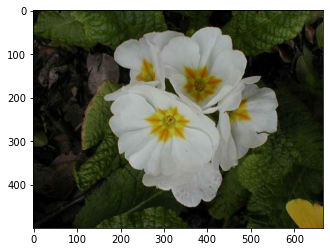

The shape of this image is: (500, 666, 3)
The label of this image is: 52


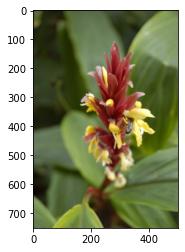

The shape of this image is: (752, 500, 3)
The label of this image is: 60


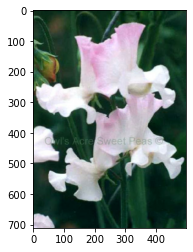

The shape of this image is: (711, 500, 3)
The label of this image is: 3


In [50]:
# TODO: Print the shape and corresponding label of 3 images in the training set.
for image, label in training_set.take(3):
    image = image.numpy().squeeze()
    label = label.numpy()

    plt.imshow(image)
    plt.show()

    print('The shape of this image is:', image.shape)
    print('The label of this image is:', label)


Text(0.5, 1.0, '52')

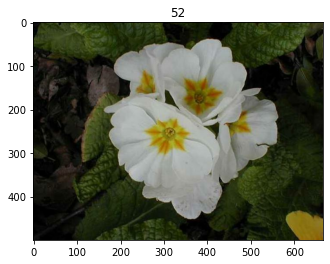

In [51]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding image label. 
for image, label in training_set.take(1):
    image = image.numpy().squeeze()
    label = label.numpy()
    
plt.imshow(image)
plt.title(label)

In [52]:
with open('label_map.json', 'r') as f:
    class_names = json.load(f)
print(json.dumps(class_names, indent=4))

{
    "21": "fire lily",
    "3": "canterbury bells",
    "45": "bolero deep blue",
    "1": "pink primrose",
    "34": "mexican aster",
    "27": "prince of wales feathers",
    "7": "moon orchid",
    "16": "globe-flower",
    "25": "grape hyacinth",
    "26": "corn poppy",
    "79": "toad lily",
    "39": "siam tulip",
    "24": "red ginger",
    "67": "spring crocus",
    "35": "alpine sea holly",
    "32": "garden phlox",
    "10": "globe thistle",
    "6": "tiger lily",
    "93": "ball moss",
    "33": "love in the mist",
    "9": "monkshood",
    "102": "blackberry lily",
    "14": "spear thistle",
    "19": "balloon flower",
    "100": "blanket flower",
    "13": "king protea",
    "49": "oxeye daisy",
    "15": "yellow iris",
    "61": "cautleya spicata",
    "31": "carnation",
    "64": "silverbush",
    "68": "bearded iris",
    "63": "black-eyed susan",
    "69": "windflower",
    "62": "japanese anemone",
    "20": "giant white arum lily",
    "38": "great masterwort",
   

Text(0.5, 1.0, 'pink-yellow dahlia')

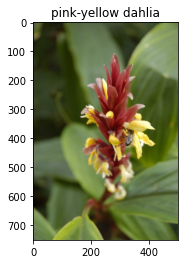

In [53]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding class name. 

for image, label in training_set.take(1):
    image = image.numpy().squeeze()
    label = label.numpy()

plt.imshow(image)
plt.title(class_names[str(label)])

In [55]:
# TODO: Create a pipeline for each set.
train_split = 60
batch_size = 32
image_size = 224


num_training_examples = (total_num_examples * train_split) // 100

def format_image(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (image_size, image_size))
    image /= 255
    return image, label


training_batches = training_set.shuffle(num_training_examples//4).map(format_image).batch(batch_size).prefetch(1)
validation_batches = validation_set.map(format_image).batch(batch_size).prefetch(1)
testing_batches = test_set.map(format_image).batch(batch_size).prefetch(1)

In [56]:
# TODO: Build and train your network.

URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

feature_extractor = hub.KerasLayer(URL, input_shape=(image_size, image_size,3))
feature_extractor.trainable = False


model = tf.keras.Sequential([
        feature_extractor,
        tf.keras.layers.Dense(num_classes, activation = 'softmax')
])



model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

EPOCHS = 10

history = model.fit(training_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/10
32/32 [==============================] - 41s 1s/step - loss: 4.2165 - accuracy: 0.1127 - val_loss: 3.0552 - val_accuracy: 0.3882
Epoch 2/10
32/32 [==============================] - 43s 1s/step - loss: 2.0482 - accuracy: 0.7020 - val_loss: 1.9758 - val_accuracy: 0.6520
Epoch 3/10
32/32 [==============================] - 45s 1s/step - loss: 1.0823 - accuracy: 0.9000 - val_loss: 1.5039 - val_accuracy: 0.7461
Epoch 4/10
32/32 [==============================] - 42s 1s/step - loss: 0.6525 - accuracy: 0.9676 - val_loss: 1.2753 - val_accuracy: 0.7765
Epoch 5/10
32/32 [==============================] - 39s 1s/step - loss: 0.4373 - accuracy: 0.9863 - val_loss: 1.1465 - val_accuracy: 0.7853
Epoch 6/10
32/32 [==============================] - 44s 1s/step - loss: 0.3143 - accuracy: 0.9922 - val_loss: 1.0534 - val_accuracy: 0.8039
Epoch 7/10
32/32 [==============================] - 45s 1s/step - loss: 0.2312 - accuracy: 0.9980 - val_loss: 0.9955 - val_accuracy: 0.8029
Epoch 8/10
32/32 [==

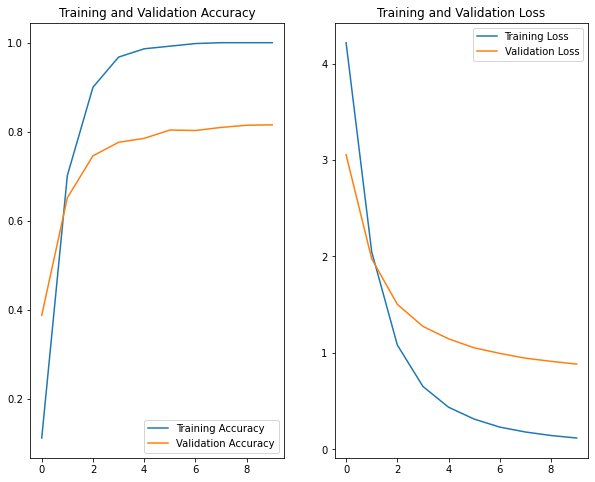

In [57]:

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

epochs_range=range(EPOCHS)

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [58]:
# TODO: Print the loss and accuracy values achieved on the entire test set.

loss, accuracy = model.evaluate(testing_batches)

print('\nLoss on the TEST Set: {:,.3f}'.format(loss))
print('Accuracy on the TEST Set: {:.3%}'.format(accuracy))

193/193 [==============================] - 123s 635ms/step - loss: 1.0129 - accuracy: 0.7725

Loss on the TEST Set: 1.013
Accuracy on the TEST Set: 77.248%


In [59]:
# TODO: Save your trained model as a Keras model.

keras_model_udacity = './model_2.h5'
model.save(keras_model_udacity)
load_model=tf.keras.models.load_model("model_2.h5",custom_objects={'KerasLayer':hub.KerasLayer})


In [60]:
def process_image(image):
    image = tf.convert_to_tensor(image, dtype=tf.float32)
    image = tf.image.resize(image, (image_size, image_size))
    image /= 255
    return image.numpy()

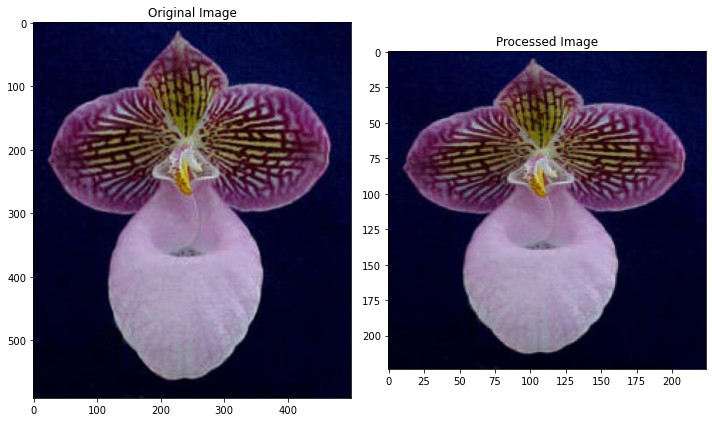

In [61]:
from PIL import Image

image_path = 'hard-leaved_pocket_orchid.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(test_image)

fig, (ax1, ax2) = plt.subplots(figsize=(10,8), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()

In [71]:
def predict(image_path, model, top_k):
    image = Image.open(image_path)
    image = np.asarray(image)
    image = process_image(image)
    expanded_image = np.expand_dims(image, axis=0)
    probes = load_model.predict(expanded_image)
    top_k_values, top_k_index = tf.nn.top_k(probes, k=top_k)
    top_k_values = top_k_values.numpy()
    top_k_index = top_k_index.numpy()
    
    
    return top_k_values, top_k_index, image

Propabilties: [[0.8841946  0.0277068  0.01215385 0.00932312 0.00511618]]
Classes Keys: [[60 23 45 14 36]]
Classes Values:
- cautleya spicata
- red ginger
- wallflower
- yellow iris
- cape flower


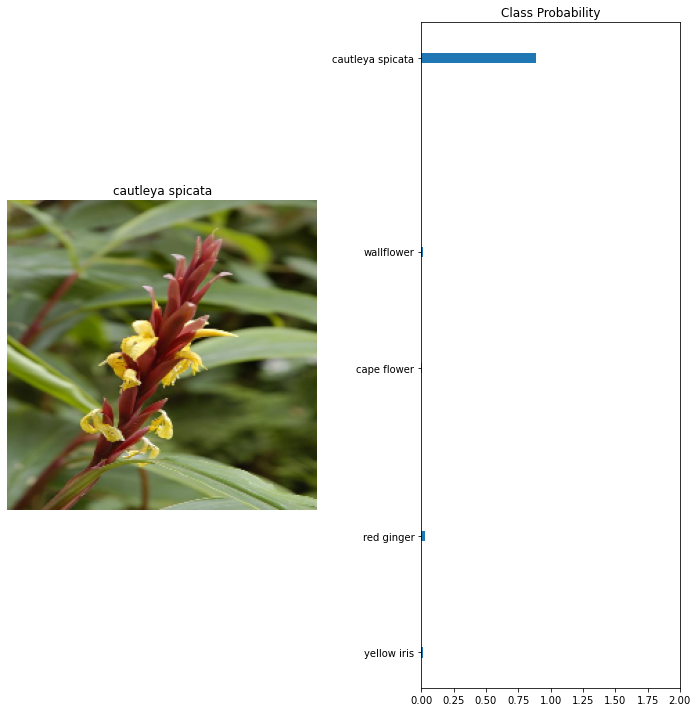

In [73]:
image1 = 'cautleya_spicata.jpg'

top_k_values, top_k_index, image = predict(images, load_model, 5)
print('Propabilties:', top_k_values)
print('Classes Keys:', top_k_index)
    
flower_classes = []
print("Classes Values:")
for idx in top_k_indices[0]:
    print("-",class_names[str(idx+1)])
    flower_classes.append(class_names[str(idx+1)])
    
fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(image)
ax1.axis('off')
ax1.set_title(flower_classes[0])
ax2.barh(top_k_indices[0], top_k_values[0])
ax2.set_aspect(0.1)

ax2.set_yticks(top_k_indices[0])
ax2.set_yticklabels(flower_classes);
ax2.set_title('Class Probability')
ax2.set_xlim(0, 2)
plt.tight_layout()
plt.show()

Propabilties: [[0.98388666 0.00261502 0.00147526 0.00118657 0.00100444]]
Classes Keys: [[ 1 12  6 67 79]]
Classes Values:
- hard-leaved pocket orchid
- king protea
- moon orchid
- bearded iris
- anthurium


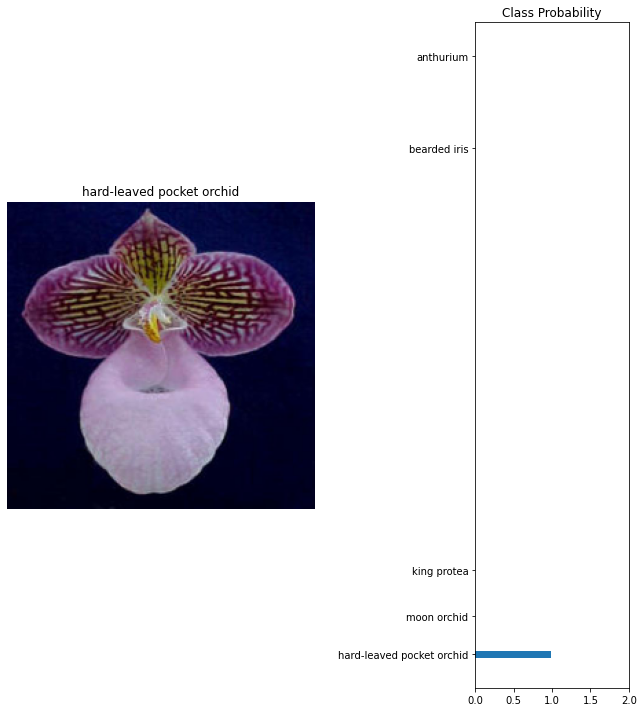

In [41]:
image1 = 'hard-leaved_pocket_orchid.jpg'

top_k_values, top_k_index, image = predict(image1, load_model, 5)
print('Propabilties:', top_k_values)
print('Classes Keys:', top_k_index)
    
flower_classes = []
print("Classes Values:")
for idx in top_k_indices[0]:
    print("-",class_names[str(idx+1)])
    flower_classes.append(class_names[str(idx+1)])
    
fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(image)
ax1.axis('off')
ax1.set_title(flower_classes[0])
ax2.barh(top_k_indices[0], top_k_values[0])
ax2.set_aspect(0.1)
ax2.set_yticks(top_k_indices[0])
ax2.set_yticklabels(flower_classes);
ax2.set_title('Class Probability')
ax2.set_xlim(0, 2)
plt.tight_layout()
plt.show()

Propabilties: [[0.31864    0.17481352 0.07891253 0.05620739 0.03845292]]
Classes Keys: [[58  4 40 70 99]]
Classes Values:
- cautleya spicata
- red ginger
- wallflower
- yellow iris
- cape flower


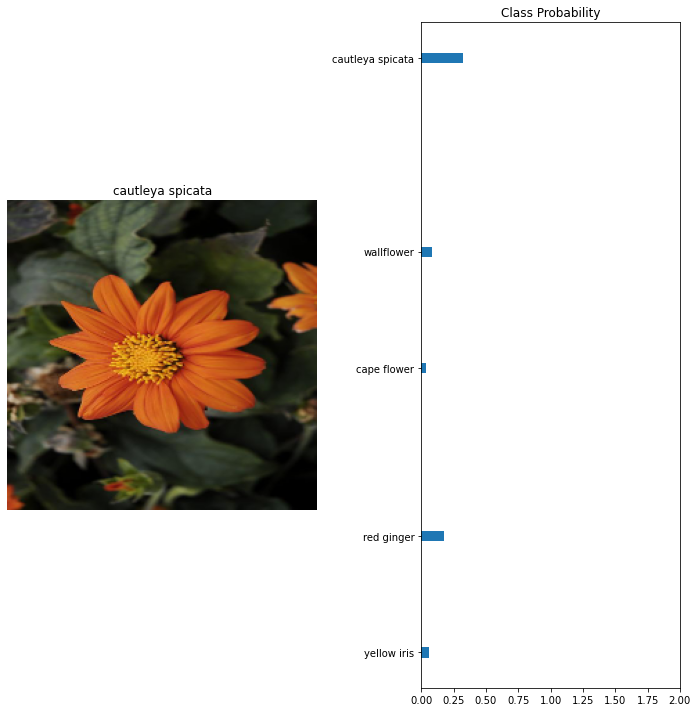

In [74]:
image1 = 'orange_dahlia.jpg'

top_k_values, top_k_index, image = predict(image1, load_model, 5)
print('Propabilties:', top_k_values)
print('Classes Keys:', top_k_index)
    
flower_classes = []
print("Classes Values:")
for idx in top_k_indices[0]:
    print("-",class_names[str(idx+1)])
    flower_classes.append(class_names[str(idx+1)])
    
fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(image)
ax1.axis('off')
ax1.set_title(flower_classes[0])
ax2.barh(top_k_indices[0], top_k_values[0])
ax2.set_aspect(0.1)
ax2.set_yticks(top_k_indices[0])
ax2.set_yticklabels(flower_classes);
ax2.set_title('Class Probability')
ax2.set_xlim(0, 2)
plt.tight_layout()
plt.show()

Propabilties: [[0.9158069  0.01906372 0.01125416 0.0069756  0.00663194]]
Classes Keys: [[51 18 68 63 81]]
Classes Values:
- wild pansy
- balloon flower
- windflower
- silverbush
- clematis


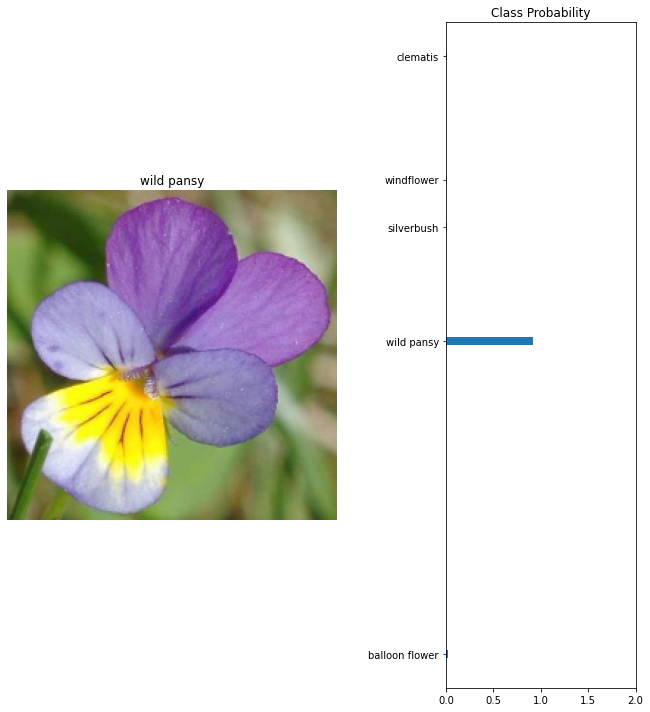

In [43]:
image1 = 'wild_pansy.jpg'

top_k_values, top_k_indices, image = predict(image1, load_model, 5)
print('Propabilties:', top_k_values)
print('Classes Keys:', top_k_indices)
    
flower_classes = []
print("Classes Values:")
for idx in top_k_indices[0]:
    print("-",class_names[str(idx+1)])
    flower_classes.append(class_names[str(idx+1)])
    
fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(image)
ax1.axis('off')
ax1.set_title(flower_classes[0])
ax2.barh(top_k_indices[0], top_k_values[0])
ax2.set_aspect(0.1)
ax2.set_yticks(top_k_indices[0])
ax2.set_yticklabels(flower_classes);
ax2.set_title('Class Probability')
ax2.set_xlim(0, 2)
plt.tight_layout()
plt.show()